In [1]:
import numpy as np
from Metrics import *
import networkx as nx

cuda


In [20]:
index = 0

folder = 'percolation_data/conc0.8_0/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask1 = data[0][index]
x1      = data[1][index]
p1      = data[2][index]
q1      = data[3][index]

folder = 'percolation_data/conc0.8_2/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask2 = data[0][index]
x2      = data[1][index]
p2      = data[2][index]
q2      = data[3][index]

In [21]:
print(x1[0])
print(x2[0])

[-17.86273332 -25.70775741 -11.36804398]
[  2.36260214 -20.90315546  -3.98032369]


In [ ]:
folder = 'data/size10000_conc0.8/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask = data[0][-1]
x      = data[1][-1]
p      = data[2][-1]
q      = data[-1][-1]

In [9]:
p_mask = data[0][-1]
x      = data[1][-1]
p      = data[2][-1]
q      = data[3][-1]

In [46]:
def get_percolation(x, p_mask, seethru=0):
    z_mask, polar_adj_arr = adj_lst(x, p_mask, seethru=seethru)
    n_polar_particles = polar_adj_arr.shape[0]
    polar_adj_arr = fix_polar_adj_arr(polar_adj_arr, p_mask, z_mask)
    edge_lst = make_edge_lst(polar_adj_arr)
    graph = nx.from_edgelist(edge_lst)
    max_cluster_size = len(max(nx.connected_components(graph), key=len))
    print(max_cluster_size)
    print(n_polar_particles)
    perc_prob = max_cluster_size / n_polar_particles
    return perc_prob

In [6]:
seethru = 0
z_mask, polar_adj_arr = adj_lst(x, p_mask, seethru=seethru)
n_polar_particles = polar_adj_arr.shape[0]


polar_adj_arr = fix_polar_adj_arr(polar_adj_arr, p_mask, z_mask)
# edge_lst = make_edge_lst(polar_adj_arr)
# graph = nx.from_edgelist(edge_lst)
# max_cluster_size = len(max(nx.connected_components(graph), key=len))
# print(max_cluster_size)
# print(n_polar_particles)
# perc_prob = max_cluster_size / n_polar_particles

In [10]:
get_percolation(x, p_mask)

0.9956631307507472

In [13]:
def above_threshold(x, p_mask, max_fraction=0.8 , radius=None, k=100):
    if not radius:
        z_mask, idx = adj_lst(x, p_mask, k=k)
        idx = fix_polar_adj_arr(idx, p_mask, z_mask)
        len_lst = [len(x) for x in idx]
        max_neighbors = max(len_lst)
        threshold = max_neighbors * max_fraction
        mask = [neighbors > threshold for neighbors in len_lst]
        return_lst = []
        for i in range(len(mask)):
            if mask[i]:
                return_lst.append(idx[i][0])
        return return_lst

In [19]:
len(above_threshold(x, p_mask, max_fraction=0.5))

848

In [13]:
idx = np.array([1,2,3,4])


array([-2, -3, -4, -5])

In [7]:
folder = 'data/testing_metrics/data.npy'

data = np.load(folder, allow_pickle=True)


In [8]:
p_mask = data[0][-1]
x      = data[1][-1]
q      = data[-1][-1]

In [11]:
branch_particles = get_branching(x, q, p_mask, threshold=0.2)

356

In [ ]:
u_tens = torch.unique(tensor)
u_tens

tensor([    3,     4,     5,  ..., 18944, 19900, 20907])

In [ ]:
p_mask[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
tens = torch.randn((10000,30))
bool_tens = tens < 0
# bool_tens = bool_tens.dtype(torch.int)

idx = torch.argwhere(bool_tens)
idx

tensor([[   0,    0],
        [   0,    1],
        [   0,    3],
        ...,
        [9999,   24],
        [9999,   27],
        [9999,   29]])

In [ ]:
print(len(x[p_mask==1]))

13267


In [ ]:
_, polar_adj_lst = adj_lst(x, p_mask, seethru=0)

In [ ]:
def fix_polar_adj_arr(adj_arr, p_mask):
    polar_idx = np.argwhere(p_mask == 1).squeeze()
    adj_lst = [] 
    for sub_arr in adj_arr:
        polar_neighbors = list(np.intersect1d(sub_arr,polar_idx))
        adj_lst.append(polar_neighbors)
    return adj_lst

def make_edge_lst(adj_arr):
    edge_lst = []
    for sub_arr in adj_arr:
        for entry in sub_arr[1:]:
            edge_lst.append((sub_arr[0],entry))

    return edge_lst

In [ ]:
edge_lst = fix_polar_adj_arr(polar_adj_lst, p_mask)

In [ ]:
edge_lst = make_edge_lst(edge_lst)
graph = nx.from_edgelist(edge_lst)

In [ ]:
cluster_lst = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
sum(cluster_lst)

13266

In [ ]:
sum(cluster_lst)/2

4818.0

In [ ]:
edgelist = [(0, 1),(1,0),(1,0),(0,1),(0,2),(2,0),(1,0),(1,2),(2,1)]  # single edge (0,1)
G = nx.from_edgelist(edgelist)
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[3]

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

653


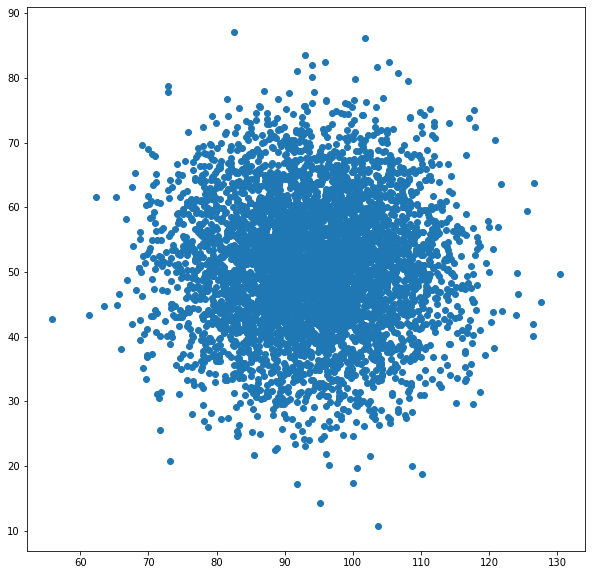

In [57]:
x, _  = make_blobs(5_000, 2, centers=1, cluster_std=1)
x = x * 10
p_mask = np.ones(5_000)

branch_particles = above_threshold(x, p_mask, max_fraction=1, radius=5)
# branch_particles = np.array(branch_particles, dtype=int)

# display_branches(x, p_mask, branch_particles)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1] )
plt.scatter(x[branch_particles][:,0],x[branch_particles][:,1])

In [15]:
branch_particles

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
tens = torch.tensor([[3,1,2],[4,6,5],[9,8,7]])

torch.sort(tens)

torch.return_types.sort(
values=tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
indices=tensor([[1, 2, 0],
        [0, 2, 1],
        [2, 1, 0]]))

In [60]:
def func():
    print('fuck')

In [64]:
func();

SyntaxError: invalid syntax (4273532911.py, line 1)

In [1]:
import numpy as np

In [2]:
def get_centers(x, p, q, p_mask, depression=5  ,num=500):    
    x_polar = x[p_mask == 1].copy()
    p_polar = p[p_mask == 1].copy()
    q_polar = q[p_mask == 1].copy()

    p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=1))[:, None]
    q_polar -= q_polar.dot(p_polar) * p_polar
    q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

    lin_trans = np.zeros((len(x_polar), 3, 3))
    lin_trans[:,:,0] = p_polar
    lin_trans[:,:,1] = q_polar
    lin_trans[:,:,2] = np.cross(p_polar,q_polar)

    x_trans = (np.linalg.inv(lin_trans) @ x_polar[:,:,None]).squeeze()

    subtract_arr =  np.zeros_like(x_trans)
    subtract_arr[:,0] = depression

    trans_centers =  x_trans - subtract_arr
    centers = (lin_trans @ trans_centers[:,:,None]).squeeze()
    sampled_centers = centers[:num]

    return sampled_centers

In [166]:
def get_prolif_positions(x, p, q, p_mask):
    x_polar = x[p_mask == 1].copy()
    p_polar = p[p_mask == 1].copy()
    q_polar = q[p_mask == 1].copy()

    p_polar /= torch.sqrt(np.sum(p_polar ** 2, dim=1))[:, None]
    q_polar -= torch.sum(q_polar * p_polar, dim=1)[:,None] * p_polar
    q_polar /= torch.sqrt(torch.sum(q_polar ** 2, dim=0))

    lin_trans = torch.zeros((len(x_polar), 3, 3))
    lin_trans[:,:,0] = p_polar
    lin_trans[:,:,1] = q_polar
    lin_trans[:,:,2] = torch.cross(p_polar,q_polar)

    new_pos = (torch.linalg.inv(lin_trans) @ x_polar[:,:,None]).squeeze()

    add_arr =  torch.zeros_like(new_pos)
    add_arr[:,1:] = torch.random.normal(size=(new_pos.shape[0],new_pos.shape[1]-1))

    new_pos += add_arr
    new_pos = (lin_trans @ new_pos[:,:,None]).squeeze()

    return new_pos


In [37]:
prolif_scale = 10

x_polar = np.array([[0.,0.,0.]])
p_polar = np.array([[0.,1.,0]])
q_polar = np.array([[1.,0.,0]])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=1))[:, None]
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=1))[:, None]

lin_trans = np.zeros((len(x_polar), 3, 3))
lin_trans[:,:,0] = p_polar
lin_trans[:,:,1] = q_polar
lin_trans[:,:,2] = np.cross(p_polar,q_polar)

x_trans = (lin_trans @ x_polar[:,:,None]).squeeze()
x_trans = x_trans[:,None]

# # subtract_arr =  np.zeros_like(x_trans)
# # subtract_arr[:,1:] = np.random.normal()

x_trans[:,1:] += np.random.normal(scale=prolif_scale, size=(x_trans.shape[0],x_trans.shape[1]))
# new_particle = (np.linalg.inv(lin_trans) @ x_trans[:,:,None]).squeeze()
# new_particle


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [158]:
prolif_scale = 1

x_polar = np.array([0.,0.,0.])
p_polar = np.array([1.,1.,0])
q_polar = np.array([0.,1.,0])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=0))
q_polar -= q_polar.dot(p_polar) * p_polar
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

lin_trans = np.zeros((3, 3))
lin_trans[:,0] = p_polar
lin_trans[:,1] = q_polar
lin_trans[:,2] = np.cross(p_polar,q_polar)

x_trans = (np.linalg.inv(lin_trans) @ x_polar).squeeze()

subtract_arr =  np.zeros((100,x_trans.shape[0]))
subtract_arr[:,1:] = np.random.normal(scale=prolif_scale, size=(100, x_trans.shape[0]-1))

new_particles = x_trans + subtract_arr

new_particles = (lin_trans @ new_particles[:,:,None]).squeeze()

In [163]:
(new_particles * np.array([1.,1.,0]))

array([[-0.76051563,  0.76051563,  0.        ],
       [-0.54512378,  0.54512378,  0.        ],
       [ 0.12277653, -0.12277653, -0.        ],
       [-0.10772113,  0.10772113,  0.        ],
       [ 0.92551485, -0.92551485,  0.        ],
       [ 0.7924383 , -0.7924383 ,  0.        ],
       [ 0.90055996, -0.90055996, -0.        ],
       [-0.08185971,  0.08185971, -0.        ],
       [-1.26533185,  1.26533185,  0.        ],
       [ 0.89158316, -0.89158316,  0.        ],
       [ 1.62988819, -1.62988819,  0.        ],
       [ 1.22062807, -1.22062807,  0.        ],
       [-0.03282871,  0.03282871, -0.        ],
       [-0.39658229,  0.39658229,  0.        ],
       [-1.40406763,  1.40406763, -0.        ],
       [-0.63646395,  0.63646395,  0.        ],
       [-0.5870505 ,  0.5870505 , -0.        ],
       [ 0.92022134, -0.92022134,  0.        ],
       [ 0.78738169, -0.78738169, -0.        ],
       [ 1.29644449, -1.29644449,  0.        ],
       [-0.32392508,  0.32392508, -0.   

In [146]:
x_polar = np.array([0.,0.,0.])

lin_trans = np.zeros((3, 3))
lin_trans[:,0] = p_polar
lin_trans[:,1] = q_polar
lin_trans[:,2] = np.cross(p_polar,q_polar)

x_trans = (np.linalg.inv(lin_trans) @ x_polar)
print(x_trans)

x_reversed = lin_trans @ (x_trans + np.array([0,1,1]))
print(x_reversed)

[0. 0. 0.]
[-0.70710678  0.70710678  1.        ]


In [79]:
x_trans[1:] + np.random.normal(scale=prolif_scale, size=(100,x_trans.shape[0]-1))

array([[ -7.04695394,   5.72650817],
       [  4.74403877, -10.09480028],
       [  4.60593477,  -6.88165772],
       [  7.49504916,  -0.06846565],
       [ 10.73492045,   2.94333592],
       [  0.82505616,   2.16562041],
       [  0.31779006,  -7.29044509],
       [ -3.05106859,  -5.34066671],
       [  6.68053251,   8.15165496],
       [-25.33727669,  15.83035473],
       [  0.17028182,  -3.3712562 ],
       [  8.07307821,  -1.85653594],
       [ 25.44276694,  -3.46904819],
       [  0.95288187,   6.8266168 ],
       [ -2.89396302,  21.12911319],
       [ -8.17497458,  11.84159802],
       [ 11.62860488, -10.02541976],
       [ -5.57803518,  -7.93492178],
       [ -7.98409459,  -0.08250032],
       [ -9.20721189,  -9.83474514],
       [-13.8753234 ,   0.5577363 ],
       [ -3.36016771,   8.12382776],
       [ -0.8349459 ,  -5.78806781],
       [  5.93036165, -26.65725548],
       [ -8.47728739, -10.06006323],
       [ -2.49258326,  -3.91244972],
       [ -5.0037387 ,   7.40839502],
 

In [65]:
p_polar = np.array([1.,1.,0])
q_polar = np.array([0.,1.,0])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=0))
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

q_polar -= q_polar.dot(p_polar) * p_polar
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

In [68]:
p_polar.dot(q_polar)

2.7755575615628914e-16

In [168]:
import torch
torch.normal(mean = 0, std = 1, size=(100,3-1))

tensor([[ 6.7085e-02,  3.5495e-01],
        [ 2.0326e-01,  4.0345e-01],
        [ 9.6871e-01, -8.3892e-02],
        [-1.1149e+00, -1.0730e+00],
        [ 3.0693e-01,  1.4901e-01],
        [ 5.5494e-01, -3.2408e-01],
        [ 1.8794e-01, -1.1529e+00],
        [-2.9047e-02, -1.1846e+00],
        [ 1.2741e-02,  4.2389e-01],
        [ 9.2619e-01,  4.4022e-01],
        [-3.3154e-01, -7.6509e-01],
        [ 6.3678e-02, -6.7471e-01],
        [-8.8524e-01,  1.9292e+00],
        [-2.7195e-01, -4.1016e-01],
        [-8.5563e-02,  1.9234e+00],
        [-1.4560e+00,  1.0947e+00],
        [ 7.5595e-01,  1.1241e-01],
        [ 4.0402e-01, -4.5818e-01],
        [-1.8542e-01,  3.3912e-02],
        [ 9.9501e-01, -6.6460e-01],
        [ 1.1961e+00, -6.3185e-01],
        [-1.1030e+00, -4.7858e-01],
        [-2.3602e-01, -3.6556e-02],
        [-1.2695e-03,  4.2818e-01],
        [ 2.7695e-01,  4.3091e-01],
        [ 1.5193e+00,  2.5917e-01],
        [-3.7697e-01, -2.4895e-01],
        [-2.7354e-02, -3.918